## Linear regression

Consider a table of controlled variable and observed value:

| $x$ (controlled) | $y$ (observed) |
|:---:|:---:|
| $x_{0}$ | $y_{0}$ |
| $x_{1}$ | $y_{1}$ |
| $\vdots$ | $\vdots$ |
| $x_{n}$ | $y_{n}$ |

We aim to find a linear function $L(x) = ax + b$ such that $y_{i} \approx ax_{i} + b$ for all $i = 1,\dots,n$.
To arrive at the least overall error, we compute for the two coefficients $a$ and $b$ by solving
$$
A^{T}Au = A^{T}y,
$$
where 
$$
u = \begin{bmatrix} a \\ b \end{bmatrix},\quad A = \begin{bmatrix} x_{1} & 1 \\ \vdots & \vdots \\ x_{n} & 1 \end{bmatrix} \quad \text{and} \quad y = \begin{bmatrix} y_{1} \\ \vdots \\ y_{n} \end{bmatrix}.
$$

### Example
A scientist is experimenting a new drug that slows down the growth of certain species of bacteria under a controlled environment.
The procedures are as follows: The initial colony of 1 CFU (colony-forming unit) is deployed in an agar plate. 
For 60 minutes, the scientist will observe the number of bacterial cells every 5 minutes. 
The following is the observed data 

| Observed time (min.) | Number of bacterial cells (CFU) |
|:---:|:---:|
|0|1|
|5|1.45|
|10|2.02|
|15|2.5|
|20|2.97|
|25|3.49|
|30|3.92|
|35|4.55|
|40|5.11|
|45|5.60|
|50|6.13|
|55|6.64|
|60|7.23|

Write the linear system for the linear regression that estimate the data in the above table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0,61,5).reshape((-1,1))
y = np.array([[1, 1.45, 2.02, 2.5, 2.97, 3.49, 3.92, 4.55, 5.11, 5.60, 6.13, 6.64, 7.23]]).T

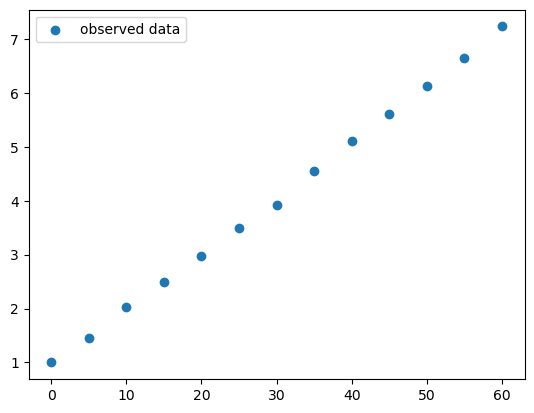

In [3]:
plt.scatter(x,y, label='observed data')
plt.legend()
plt.show()

In [4]:
A = np.hstack((x, np.ones(np.shape(x))))
u = np.linalg.solve(A.T@A,A.T@y)
a = u[0]
b = u[1]
print(f"The best approximation linear function is y = {a}x + {b}")

The best approximation linear function is y = [0.10374725]x + [0.93450549]


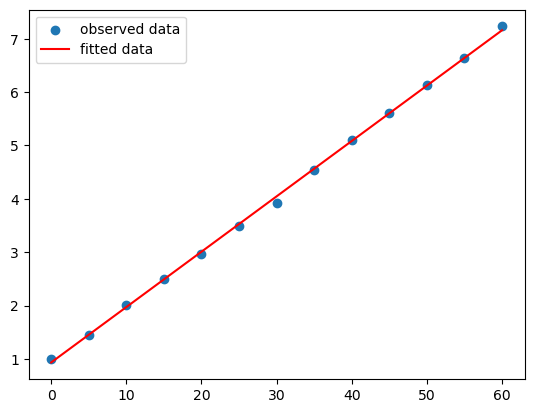

In [5]:
y_fitted = a*x + b
plt.scatter(x,y, label='observed data')
plt.plot(x,y_fitted, 'r-', label='fitted data')
plt.legend()
plt.show()

### Example (Higher dimensions)

Let us model **daily electricity consumption** (in *MWh*), the variable $y$, for an industrial plant as a function of three measurable variables:
- The **production output** $x_{1}$ in the unit of *tons/day*.
- The **average ambient** temperature $x_{2}$ in the unit of *degree celcius*.
- The **operating hours** $x_{3}$ in the unit of *hours/day*.

The following are the sample dataset, in the form of lists observed throughout 20 days.

In [6]:
output_tons = [45, 38, 50, 42, 55, 36, 60, 47, 53, 40,
               49, 35, 58, 43, 51, 39, 56, 46, 59, 37]

temperature_C = [31, 29, 32, 28, 34, 30, 33, 31, 32, 27,
                 29, 26, 35, 30, 33, 28, 34, 30, 35, 27]

operating_hours = [18, 17, 20, 19, 21, 16, 22, 19, 20, 17,
                   19, 16, 22, 18, 20, 18, 21, 19, 22, 17]

energy_MWh = [182, 166, 196, 178, 210, 160, 222, 188, 203, 171,
              189, 156, 219, 177, 200, 170, 211, 185, 223, 164]

Next, we prepare the linear regression ingredients and then solve for the optimal regression parameters.

In [7]:
X = np.array([output_tons, temperature_C, operating_hours]).T
y = np.array([energy_MWh]).T

In [8]:
A = np.hstack((X, np.ones((20,1))))
u = np.linalg.solve(A.T@A,A.T@y)
print(u)

[[ 1.767913  ]
 [ 0.52186882]
 [ 2.91241464]
 [33.99361319]]


Our prediction equation is $y_{\text{predict}} = u_{1}x_{1} + u_{2}x_{2} + u_{3}x_{3} + u_{4}$.
We construct it with a function.

In [9]:
u = u.reshape(-1,)
prediction = lambda production, temp, hours: np.dot(u, np.array([production, temp, hours, 1]))

Let's do a prediction of the electricity consumption when the production output is 44 tons/day, the average temperature is 32 degree celcius and the operating hours is 20 hours/day.

In [10]:
consumption = prediction(44, 32, 20)
print(f"The predicted consumption is {consumption}")

The predicted consumption is 186.72988003650448


-----